## Environment Setting

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oumaed","key":"809d5706169486ff89b8e5055a954e3e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:14<00:00, 40.6MB/s]
100% 2.70G/2.70G [01:14<00:00, 38.9MB/s]


In [ ]:
# extracting data
!unzip new-plant-diseases-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant disea

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Add, ReLU, Activation, ZeroPadding2D, GlobalAveragePooling2D

In [ ]:
image_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

In [ ]:
train_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_path="/content/test/test"

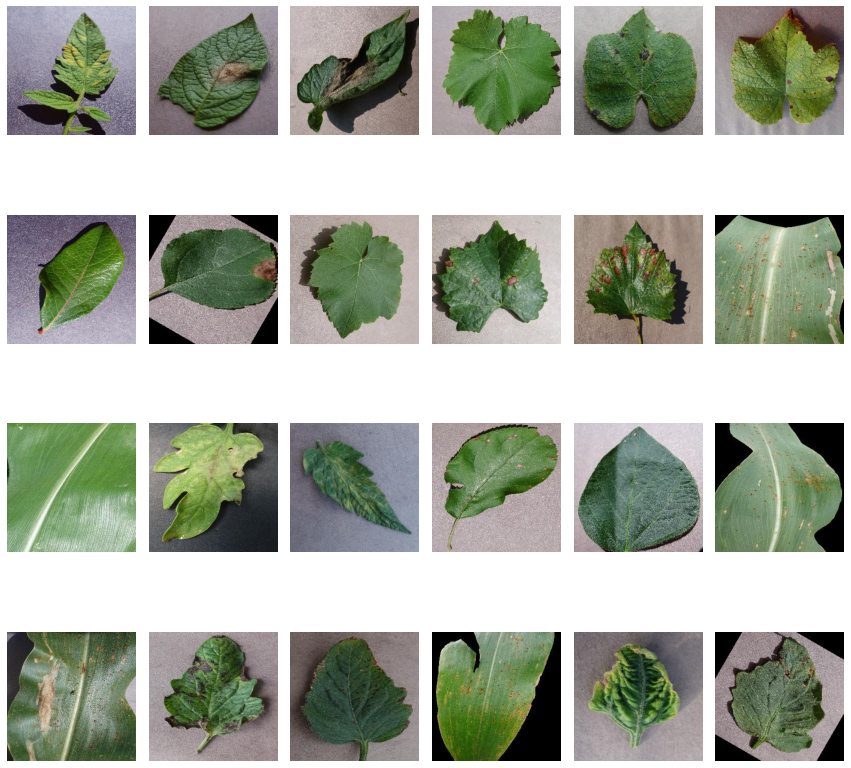

In [ ]:
# Visualizing plants
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [ ]:
# Plants classes
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Apple___Black_rot', 'Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___healthy', 'Peach___healthy', 'Tomato___Septoria_leaf_spot', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Soybean___healthy', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Squash___Powdery_mildew', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Pepper,_bell___healthy', 'Grape___Black_rot'

In [ ]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 38


In [ ]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

,Number of images
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
Apple___Apple_scab,2016
Apple___Black_rot,1987
Tomato___Early_blight,1920
"Pepper,_bell___Bacterial_spot",1913
Blueberry___healthy,1816
Peach___Bacterial_spot,1838
Tomato___Target_Spot,1827
Tomato___healthy,1926
Peach___healthy,1728


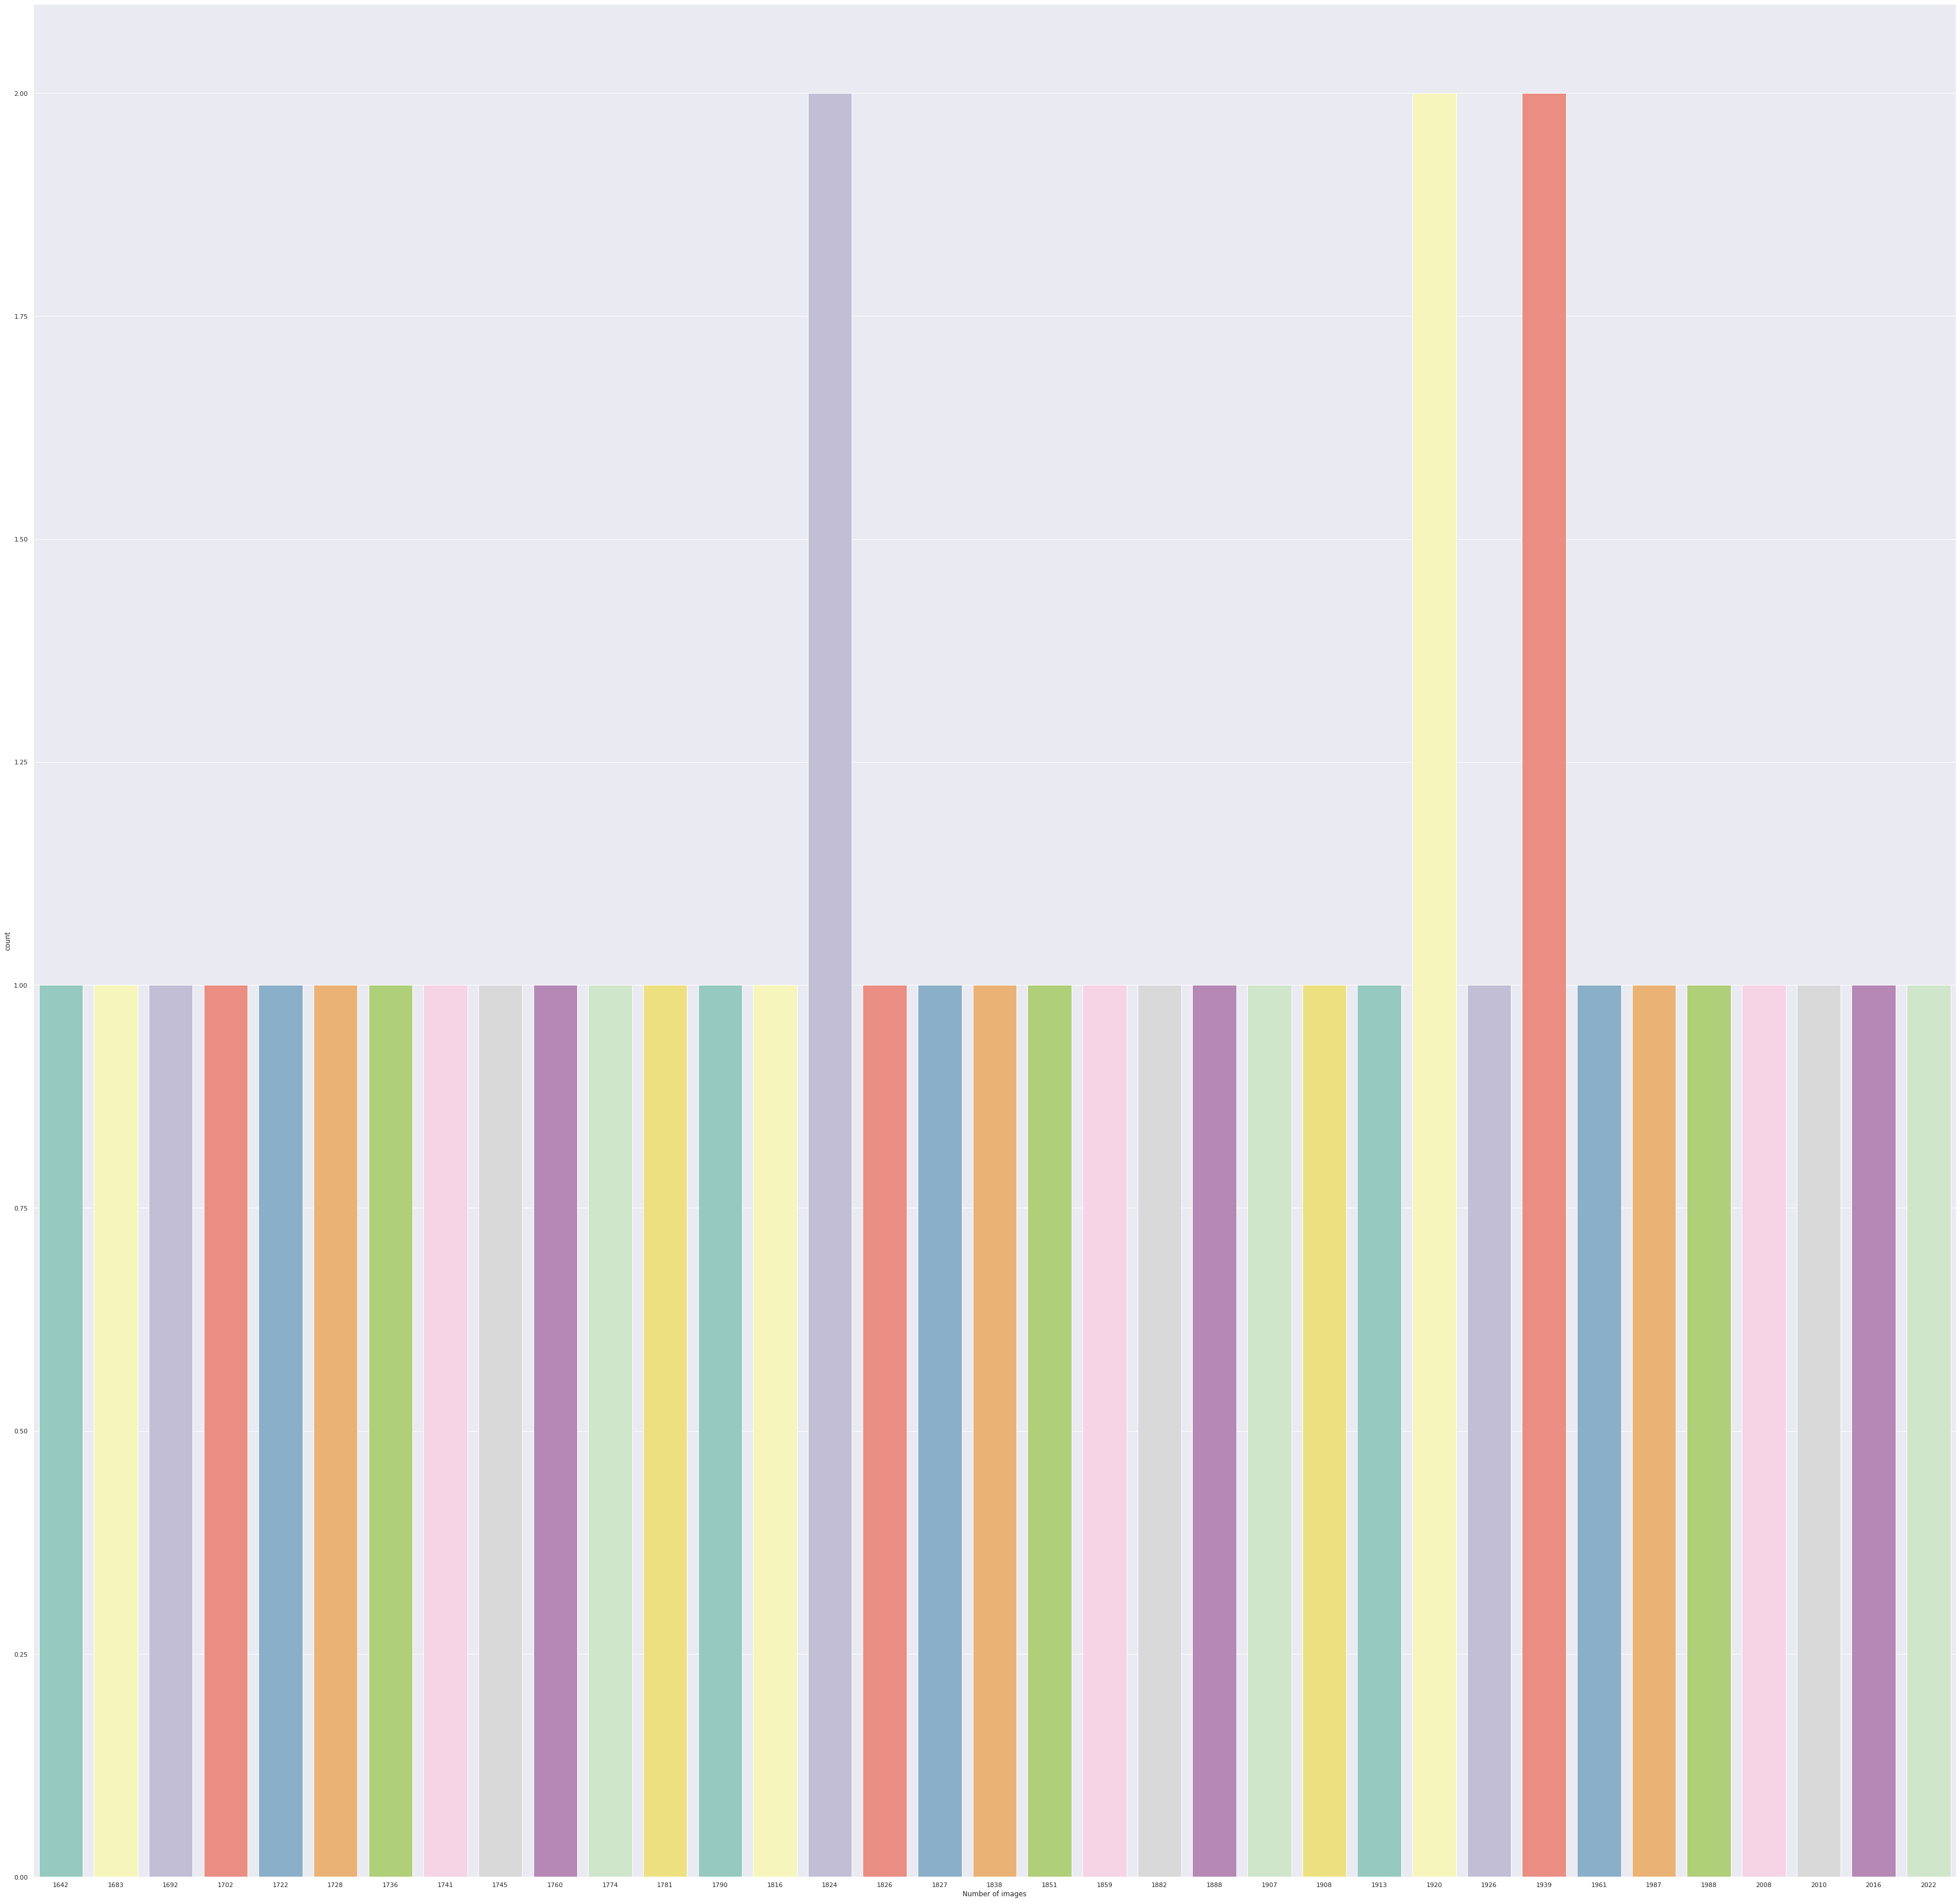

In [ ]:
sns.set(rc={'figure.figsize':(60,60)})
ax = sns.countplot(x="Number of images", data=images_each_class,palette="Set3")

In [ ]:
batch_size=20

In [ ]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.2,fill_mode='nearest')

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator=traindata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [ ]:
valid_data_generator=validdata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True)

Found 70295 images belonging to 38 classes.


In [ ]:
test_data_generator=testdata_generator.flow_from_directory(valid_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples

In [ ]:
# Definition of the model
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False, input_shape=(224,224, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

### Training

In [ ]:
history= model.fit(train_data_generator, 
                   steps_per_epoch=train_number//batch_size, 
                   validation_data= valid_data_generator, 
                   validation_steps= valid_number//batch_size,
                   shuffle=True, 
                   
                   epochs =10, 
                   batch_size = 20,callbacks=[callback])

Epoch 1/10
3514/3514 [==============================] - 1144s 322ms/step - loss: 0.4353 - accuracy: 0.8677 - val_loss: 6.4726 - val_accuracy: 0.3153
Epoch 2/10
3514/3514 [==============================] - 1103s 314ms/step - loss: 0.2286 - accuracy: 0.9292 - val_loss: 2.1964 - val_accuracy: 0.6544
Epoch 3/10
3514/3514 [==============================] - 1112s 316ms/step - loss: 0.1683 - accuracy: 0.9475 - val_loss: 2.4975 - val_accuracy: 0.5985
Epoch 4/10
3514/3514 [==============================] - 1129s 321ms/step - loss: 0.1300 - accuracy: 0.9585 - val_loss: 0.5956 - val_accuracy: 0.8639
Epoch 5/10
3514/3514 [==============================] - 1133s 322ms/step - loss: 0.1149 - accuracy: 0.9636 - val_loss: 0.5565 - val_accuracy: 0.8870
Epoch 6/10
3514/3514 [==============================] - 1127s 321ms/step - loss: 0.0949 - accuracy: 0.9700 - val_loss: 0.2251 - val_accuracy: 0.9391
Epoch 7/10
3514/3514 [==============================] - 1132s 322ms/step - loss: 0.0856 - accuracy: 0.9730

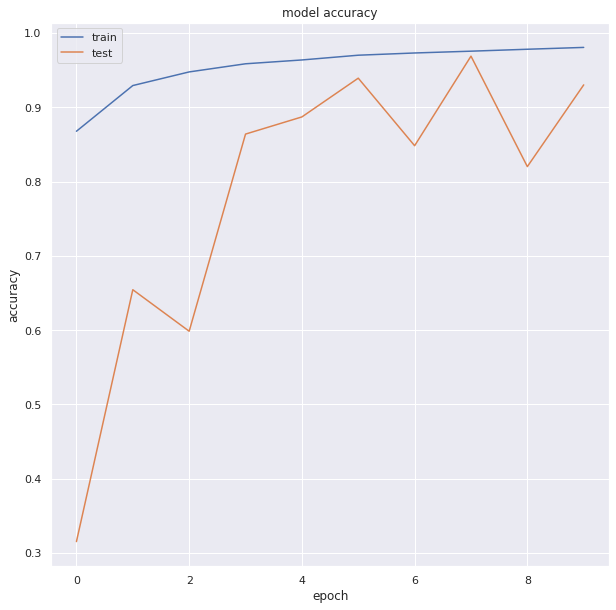

In [ ]:
# curve of model accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

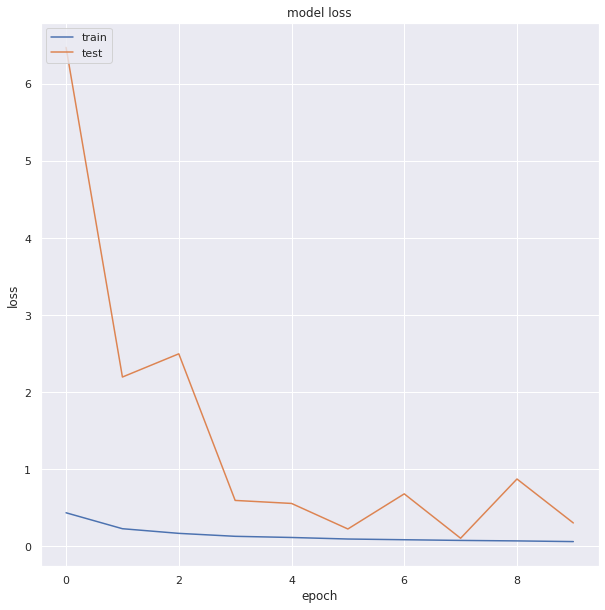

In [ ]:
# curve of model loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions=model.predict(test_data_generator)

879/879 [==============================] - 46s 51ms/step


### Confusion Matrix

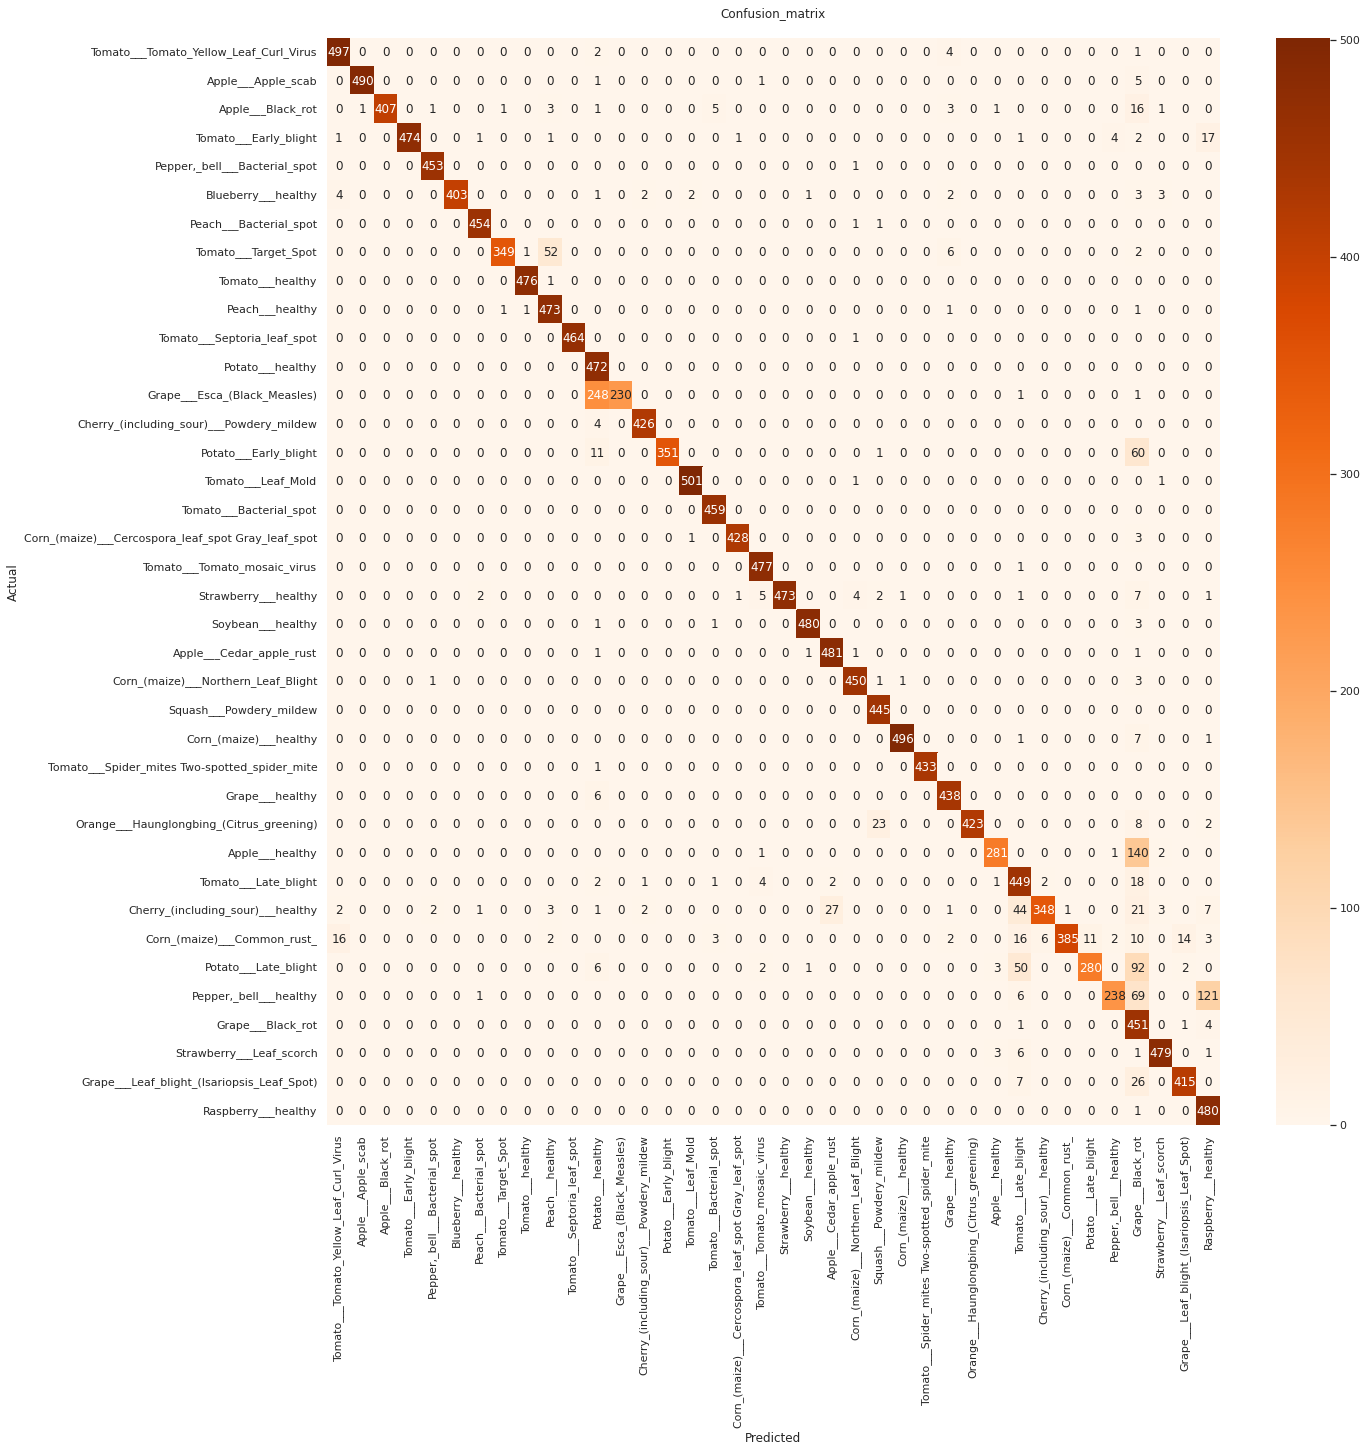

In [ ]:
plt.figure(figsize=(20,20))
cm= confusion_matrix(test_data_generator.classes,predictions.argmax(axis=1))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="Oranges",xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion_matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
# Model Evaluation
print(classification_report(test_data_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       504
           1       1.00      0.99      0.99       497
           2       1.00      0.93      0.96       440
           3       1.00      0.94      0.97       502
           4       0.99      1.00      0.99       454
           5       1.00      0.96      0.98       421
           6       0.99      1.00      0.99       456
           7       0.99      0.85      0.92       410
           8       1.00      1.00      1.00       477
           9       0.88      0.99      0.93       477
          10       1.00      1.00      1.00       465
          11       0.62      1.00      0.77       472
          12       1.00      0.48      0.65       480
          13       0.99      0.99      0.99       430
          14       1.00      0.83      0.91       423
          15       0.99      1.00      1.00       503
          16       0.98      1.00      0.99       459
          17       1.00    